<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

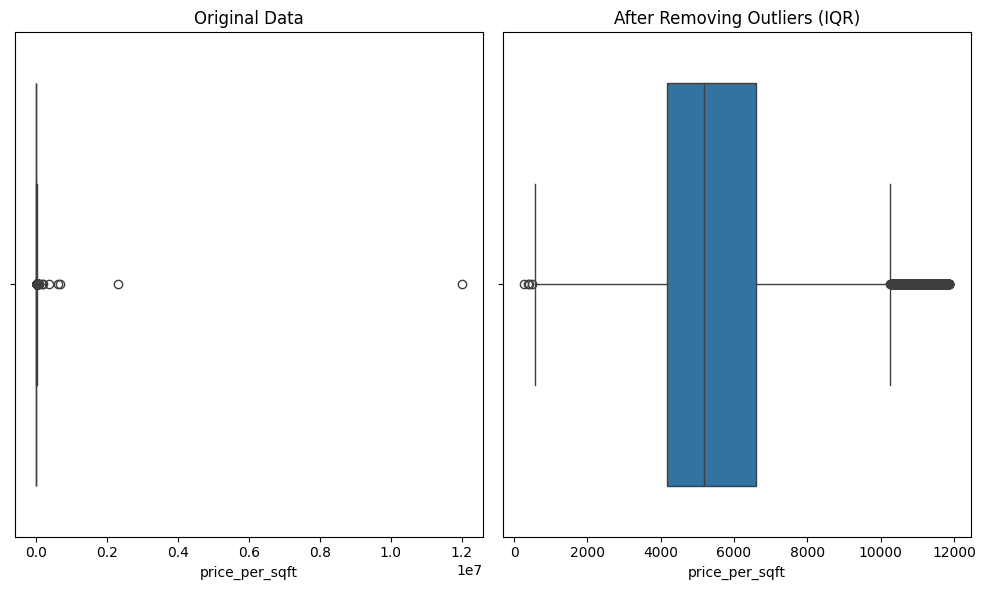

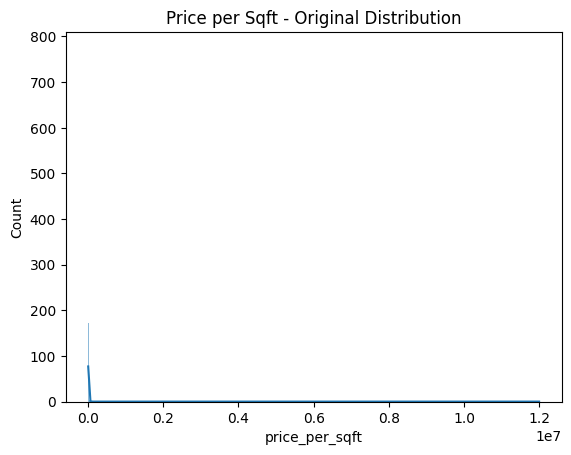

Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


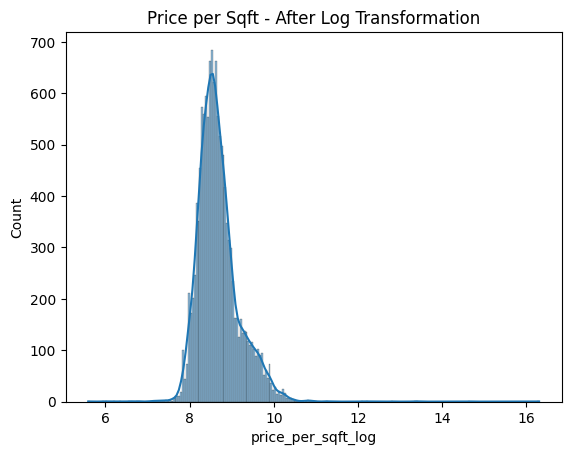

Skewness (after transformation): 1.4003259019533636
Kurtosis (after transformation): 9.203000543610957


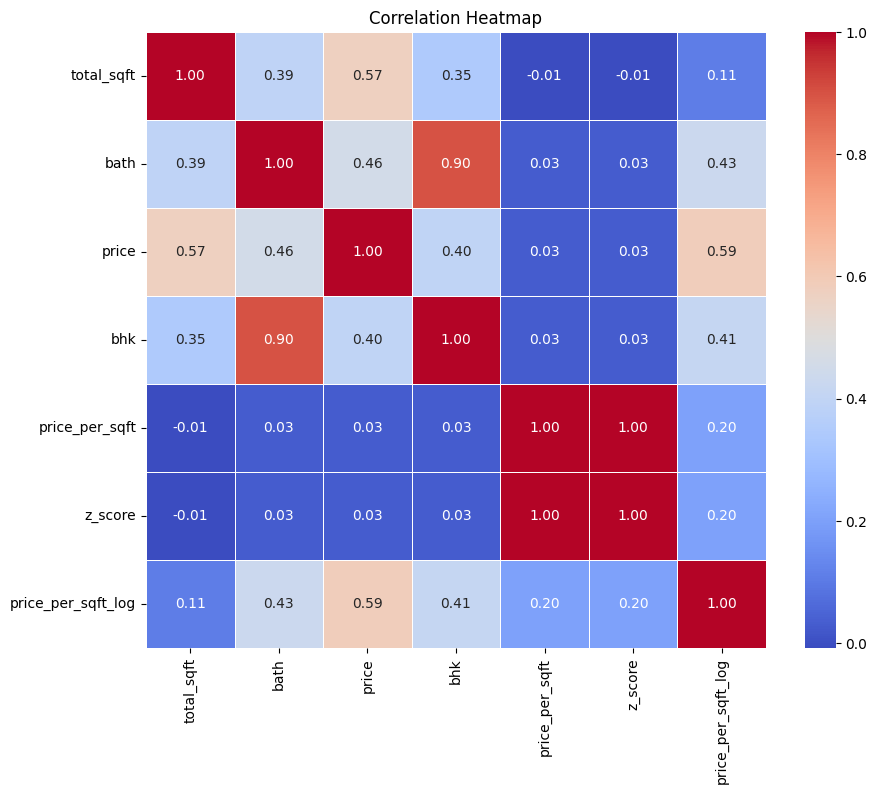

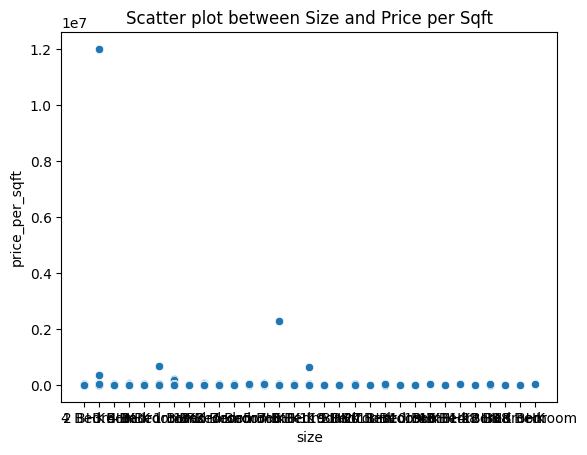

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis

url = 'https://drive.google.com/uc?id=1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P'
df = pd.read_csv(url)

print(df.info())
print(df.describe())
print(df.isnull().sum())

mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

outliers = df[(df['price_per_sqft'] > mean + 3 * std_dev) | (df['price_per_sqft'] < mean - 3 * std_dev)]
df_no_outliers_mean_std = df[(df['price_per_sqft'] <= mean + 3 * std_dev) & (df['price_per_sqft'] >= mean - 3 * std_dev)]

lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)
df_no_outliers_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers_IQR = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

df['z_score'] = zscore(df['price_per_sqft'])
df_no_outliers_zscore = df[df['z_score'].abs() <= 3]

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price_per_sqft'])
plt.title('Original Data')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers_IQR['price_per_sqft'])
plt.title('After Removing Outliers (IQR)')
plt.tight_layout()
plt.show()

sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Price per Sqft - Original Distribution')
plt.show()

print(f"Skewness: {skew(df['price_per_sqft'])}")
print(f"Kurtosis: {kurtosis(df['price_per_sqft'])}")

df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title('Price per Sqft - After Log Transformation')
plt.show()

print(f"Skewness (after transformation): {skew(df['price_per_sqft_log'])}")
print(f"Kurtosis (after transformation): {kurtosis(df['price_per_sqft_log'])}")

numeric_cols = df.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

sns.scatterplot(x=df['size'], y=df['price_per_sqft'])
plt.title('Scatter plot between Size and Price per Sqft')
plt.show()
